In [1]:
import requests 
import pandas as pd
import io
import matplotlib as plt
import numpy as np
import time
from scipy import stats
import matplotlib.pyplot as plta

In [2]:
API_KEY = "J9C3GHZ237UWFTA2"

In [3]:
def alpha_vantage_equity(symb,API_KEY):
    link = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={}&outputsize=full&apikey={}&datatype=csv'.format(symb,API_KEY)
    rq = requests.get(link)
    urlData = rq.content
    rawData = pd.read_csv(io.StringIO(urlData.decode('utf-8')))
    # returns encoded utf-8 CSV format but in a Pandas DataFrame
    return rawData

In [4]:
def build_table(tickers,API_KEY):

    data = pd.DataFrame(columns=['timestamp','ticker','adjusted_close'])

    for stock in tickers:
        equity_data = alpha_vantage_equity(stock,API_KEY)
        print(stock.strip())
        equity_data = equity_data.drop(['open','high','low','close','volume','dividend_amount','split_coefficient'], axis=1)
        tmp_ticker = [stock for i in range(len(equity_data['adjusted_close']))]
        equity_data.insert(1,'ticker',tmp_ticker)
        data = data.append(equity_data,ignore_index=True)
        time.sleep(13)
    
    return data

In [5]:
def build_table(tickers,API_KEY):

    data = pd.DataFrame(columns=['timestamp','ticker','adjusted_close'])

    for stock in tickers:
        equity_data = alpha_vantage_equity(stock,API_KEY)
        print(stock.strip())
        
        equity_data = equity_data.drop(['open','high','low','close','volume','dividend_amount','split_coefficient'],axis=1)
        tmp_ticker = [stock for i in range(len(equity_data['adjusted_close']))]
        equity_data.insert(1,'ticker',tmp_ticker)

        data = data.append(equity_data,ignore_index=True)
        time.sleep(13)

    return data

In [6]:
def portfolio_returns(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights) * 252
    std = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)

    return std, returns

In [7]:
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate, num_equities):

    results = np.zeros((num_equities,num_portfolios))
    weights_record = []

    for i in range(num_portfolios):
        weights = np.random.random(num_equities)
        weights /= np.sum(weights)
        weights_record.append(weights)

        portfolio_std_dev, portfolio_return = portfolio_returns(weights,mean_returns,cov_matrix)

        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate)/portfolio_std_dev

    
    return [results, weights_record]

In [8]:
def parse_data(data_input):
    weights_column = []
    vol_column = []
    return_column = []
    sr_column = []
    data_output = pd.DataFrame()

    for j in range(15000):
        weights_column.append(out_data[1][j])
        vol_column.append(out_data[0][0][j])
        return_column.append(out_data[0][1][j])
        sr_column.append(out_data[0][2][j])

    data_output['weights'] = weights_column
    data_output['volatility'] = vol_column
    data_output['return'] = return_column
    data_output['sharpe'] = sr_column

    return data_output

In [9]:
plt.style.use('fivethirtyeight')
np.random.seed(777)
%matplotlib inline

tickers = ['FB','TSLA','AMZN','BA']

data = build_table(tickers,API_KEY)

df = data.set_index('timestamp')
table = df.pivot(columns = 'ticker')
table.columns = [col[1] for col in table.columns]

returns = table.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()

num_portfolios = 15000
risk_free_rate = 0.01414

FB
TSLA
AMZN
BA


In [10]:
out_data = random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate,len(tickers))
final_frame = parse_data(out_data)

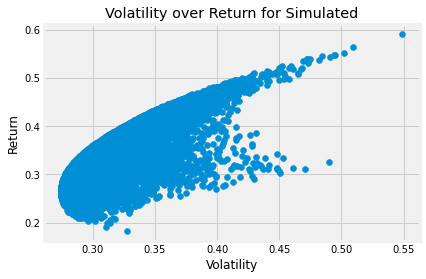

In [22]:
plt.pyplot.scatter(final_frame['volatility'],final_frame['return'],)
plt.pyplot.title('Volatility over Return for Simulated')
plt.pyplot.xlabel('Volatility')
plt.pyplot.ylabel('Return')
plt.pyplot.savefig('eft.png',dpi=750)

In [11]:
# return portfolios

sharpe_frame = (final_frame.sort_values(by='sharpe',ascending=False)).head(5)
sharpe_frame = sharpe_frame.reset_index(drop=True)

# print highest Sharpe Allocation
sharpe_frame.loc[0]['weights']
weights_out = [str(round(weight,3)*100)+'%' for weight in sharpe_frame.loc[0]['weights']]
print('Highest Sharpe Allocation')
print([weights_out[i]+' of: '+tickers[i] for i in range(len(tickers))])
print('Annualized Return: '+str(round(sharpe_frame.loc[0]['return']*100,2))+'%')
print('Annualized Volatility: '+str(round(sharpe_frame.loc[0]['volatility']*100,2))+'%')

# print highest Return 

mean_frame = (final_frame.sort_values(by='return',ascending=False)).head(5)
mean_frame = sharpe_frame.reset_index(drop=True)

print('\n')
# print highest Sharpe Allocation
sharpe_frame.loc[0]['return']
weights_out = [str(round(weight,3)*100)+'%' for weight in mean_frame.loc[0]['weights']]
print('Highest Return Allocation')
print([weights_out[i]+' of: '+tickers[i] for i in range(len(tickers))])
print('Annualized Return: '+str(round(sharpe_frame.loc[0]['return']*100,2))+'%')
print('Annualized Volatility: '+str(round(sharpe_frame.loc[0]['volatility']*100,2))+'%')


Highest Sharpe Allocation
['16.6% of: FB', '0.2% of: TSLA', '38.7% of: AMZN', '44.5% of: BA']
Annualized Return: 43.95%
Annualized Volatility: 35.47%


Highest Return Allocation
['16.6% of: FB', '0.2% of: TSLA', '38.7% of: AMZN', '44.5% of: BA']
Annualized Return: 43.95%
Annualized Volatility: 35.47%
